In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import time

In [10]:
n_data = 4
data = np.ones((n_data,4,1))

print(data.shape)

data[:,0,0] = -1

print(data)

(4, 4, 1)
[[[-1.]
  [ 1.]
  [ 1.]
  [ 1.]]

 [[-1.]
  [ 1.]
  [ 1.]
  [ 1.]]

 [[-1.]
  [ 1.]
  [ 1.]
  [ 1.]]

 [[-1.]
  [ 1.]
  [ 1.]
  [ 1.]]]


In [28]:

n_nodes = data.shape[1] * data.shape[2]

batch_size = n_data

num_iter = data.shape[0] // batch_size

# Initialize weight matrix
weight = np.zeros((n_nodes, n_nodes))

# Process in batches

for i in range(0, num_iter):
    batch = data[i*batch_size:i*batch_size + batch_size].reshape(batch_size, -1, 1)
    
    inner_product = np.matmul(batch, batch.transpose(0, 2, 1))

    weight += np.sum(inner_product, axis=0)

# # Zero out the diagonal
weight[np.eye(n_nodes, dtype=bool)] = 0

print(weight)


[[ 0. -4. -4. -4.]
 [-4.  0.  4.  4.]
 [-4.  4.  0.  4.]
 [-4.  4.  4.  0.]]


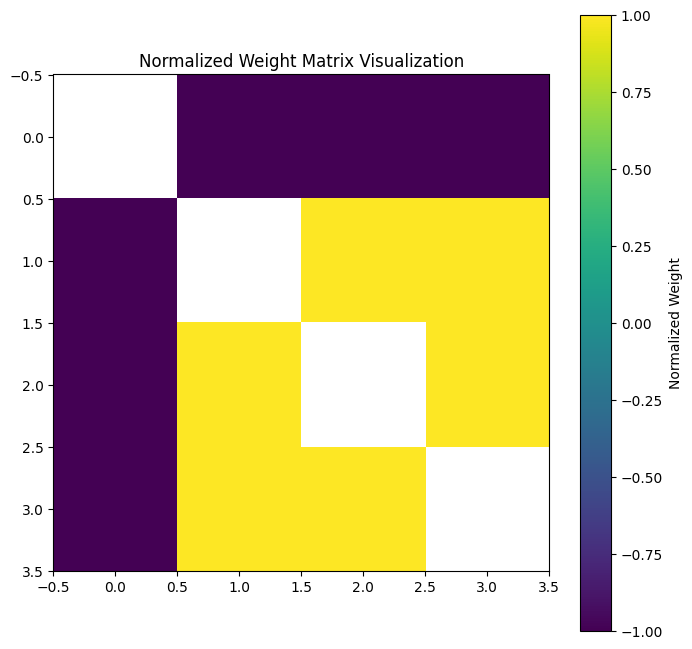

[[ 0. -1. -1. -1.]
 [-1.  0.  1.  1.]
 [-1.  1.  0.  1.]
 [-1.  1.  1.  0.]]


In [87]:
W_norm = weight / weight.max()

viz_img = np.copy(W_norm)
np.fill_diagonal(viz_img, np.nan)

# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(viz_img, cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()
print(W_norm)

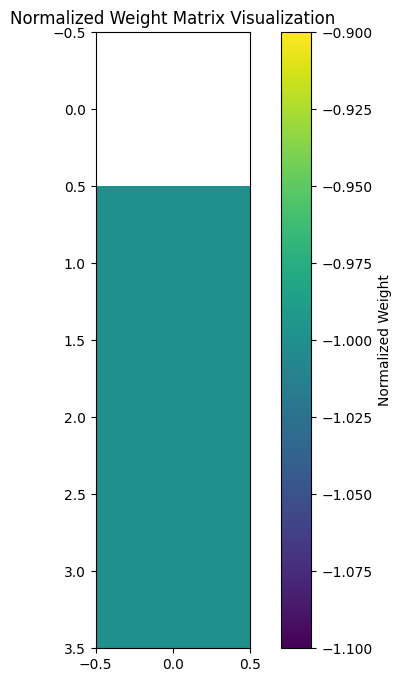

In [31]:
# Visualize the weight matrix
plt.figure(figsize=(8, 8))
plt.imshow(viz_img[0,:].reshape(data.shape[1], data.shape[2]), cmap='viridis')
plt.colorbar(label='Normalized Weight')
plt.title('Normalized Weight Matrix Visualization')
plt.show()

In [88]:
random_img = np.ones((data.shape[1],data.shape[2]))
network = random_img @ random_img.T
print(network.shape)

(4, 4)


In [152]:
node = np.random.choice(n_nodes, 1)[0]
print(f"Selected Node {node}")

energy_curr = -1 * network[node,:] @ W_norm[node,:]
energy_flip = network[node,:] @ W_norm[node,:] # -1 * -1 = 1

if energy_flip < energy_curr:
    print(f"Energy Before: {-1 * np.sum(network * W_norm)}")

    network[node,:] *= -1
    network[:,node] *= -1

    row_j = node // data.shape[1]
    col_j = node % data.shape[1]
    # random_img[row_j, col_j] *= -1
    random_img[col_j, row_j] *= -1

    print(f"Energy After: {-1 * np.sum(network * W_norm)}")
    plt.imshow(random_img, cmap='gray')
    plt.show()
else:
    print("No change")

Selected Node 0
No change


'Energy: -499.48720198917636'

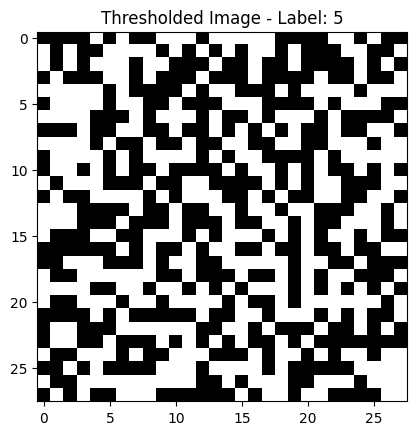

In [172]:
frames = []

for _ in range(100):

    node = np.random.choice(n_nodes, 1)[0]

    energy_curr = network[node,:] @ W_norm[node,:]
    energy_flip = -1 * network[node,:] @ W_norm[node,:]

    if energy_flip < energy_curr:
        network[node,:] *= -1
        network[:,node] *= -1

        row_j = node // data.shape[1]
        col_j = node % data.shape[1]
        random_img[row_j, col_j] *= -1
        frames.append(random_img)

        clear_output(wait=True)
        display(f"Energy: {np.sum(network * W_norm)}")
        
plt.imshow(random_img, cmap='gray')
plt.title(f'Thresholded Image - Label: {train_labels[0]}')
plt.show()

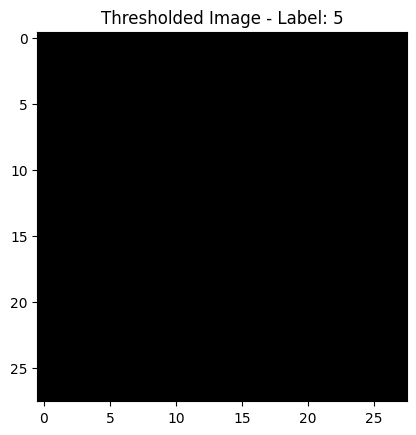

In [ ]:
energy = my_image.reshape(1,-1)

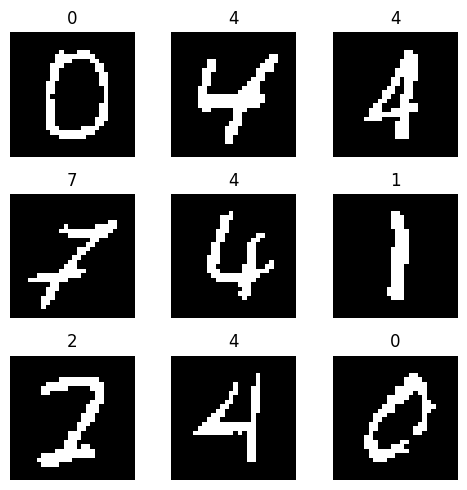

In [16]:
# Get a batch of images
images, labels = next(iter(train_loader))

# Function to show a grid of images
def show_image_grid(images, labels, nrow=3, ncol=3):
    fig, axes = plt.subplots(nrow, ncol, figsize=(5, 5))
    axes = axes.flatten()
    
    for img, ax, label in zip(images[:nrow * ncol], axes, labels[:nrow * ncol]):
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f'{label.item()}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display the grid
show_image_grid(images, labels)